## Train on custiom data (detecting Orlen's Logo, Circle K's Logo and Price Tags)


### Import libraries

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from ultralytics import YOLO
from scripts import utils
%matplotlib inline


TRAIN_DIR = r'custom_data/roboflow/images/train'
VAL_DIR = r'custom_data/roboflow/images/valid'
TEST_DIR = r'custom_data/roboflow/images/test'

### Training
For details on how to use the YOLO model check out [ultralytics documentation](https://docs.ultralytics.com/). The cell below will create a YOLO model and transfer pretrained weights. In the next line the model is trained. As the data atributte we specify `config.yaml`, because that is where the paths to data and class names are specified.

In [2]:
# model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights
# results = model.train(data='config.yaml', epochs=1)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [3]:
results

### Plot predicitons after training on custiom data.


image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\images\train\1.jpg: 448x640 (no detections), 226.5ms
Speed: 4.1ms preprocess, 226.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 (no detections), 162.6ms
Speed: 3.0ms preprocess, 162.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


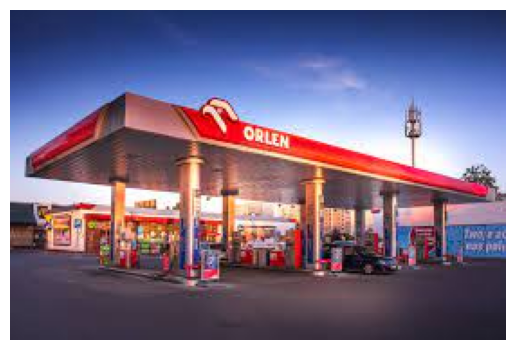

In [4]:
first_training_image_path = r'custom_data/images/train/1.jpg'
results = model(first_training_image_path)  # Try to detect something
utils.plot_results(results=results, model=model)  # Use utils script to plot the results

In [5]:
# images = os.listdir(TRAIN_DIR)
# for img in images:
#     img_path = TRAIN_DIR + fr'/{img}'
#     results = model(img_path)
#     utils.plot_results(results=results,model=model)

### More advanced plotting


image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\images\train\1.jpg: 448x640 (no detections), 322.6ms
Speed: 9.0ms preprocess, 322.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\images\train\2.png: 448x640 (no detections), 304.4ms
Speed: 8.0ms preprocess, 304.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\images\train\3.png: 448x640 (no detections), 363.0ms
Speed: 7.0ms preprocess, 363.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\images\train\IMG_20230606_174656.jpg: 480x640 (no detections), 164.5ms
Speed: 7.0ms preprocess, 164.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detec

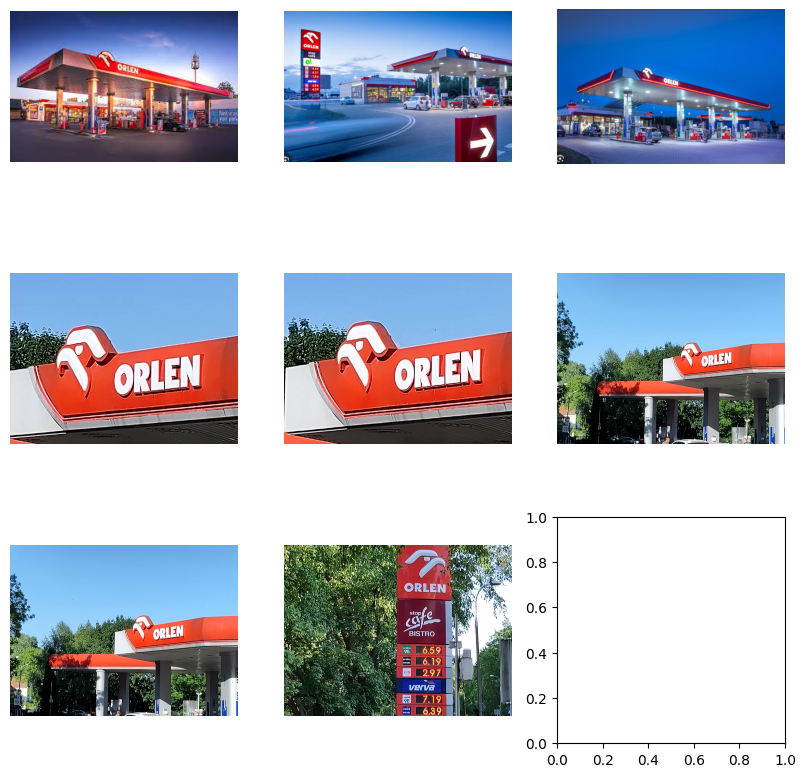

In [7]:
from scripts import utils
utils.plot_results_one_fig(dir=TRAIN_DIR, model=model)

In [8]:
trained_myself = YOLO(r'runs\detect\train22\weights\best.pt')


image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\20220910_202606_jpg.rf.8e280a68116711211e2e01ada832c143.jpg: 640x640 1 orlen, 1 prices, 642.6ms
Speed: 5.0ms preprocess, 642.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\IMG_20230606_174710_jpg.rf.2c24f95c364721b9c87e5f11887ab6c5.jpg: 640x640 1 orlen, 1 prices, 457.8ms
Speed: 8.4ms preprocess, 457.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\IMG_20230606_193015_jpg.rf.30c164d15d2a356689df2e4369c0cb0e.jpg: 640x640 1 circlek, 2 pricess, 259.2ms
Speed: 4.0ms preprocess, 259.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\IMG

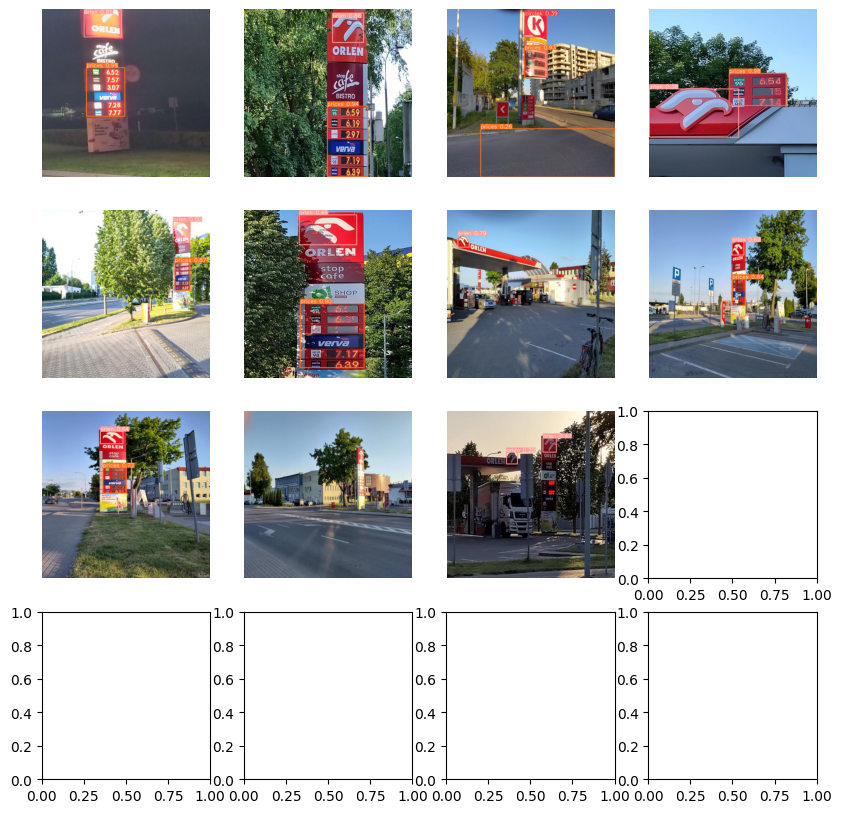

In [14]:
utils.plot_results_one_fig(dir=VAL_DIR, model=trained_myself)
